Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#### Load the movies dataset 
df = pd.read_csv('automobile.txt')
print(df.head(10))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd    

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove ['normalized-losses'] from the data set as has a lot of missing data.

In [6]:
# Drop normalized-losses as it has a lot of missing data.
df = df.drop(columns=['normalized-losses'])

#### Remove any duplicate rows

In [7]:
# Drop duplicate rows
df = df.drop_duplicates()

#### Remove rows with missing data 

Some Cars in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [10]:
# Handle missing values
df = df.replace('?', pd.NA)
df = df.dropna()

In [11]:
# Convert column to appropriate data type
df['price'] = df['price'].astype(float)

### Finding Certain Cars
Locate all Cars in the "Audi" make. 

In [12]:
# Create a dataframe with all the cars in the "audi" make
audi_cars = df[df['make'] == 'audi']
print(audi_cars)

   symboling  make fuel-type aspiration num-of-doors body-style drive-wheels  \
3          2  audi       gas        std         four      sedan          fwd   
4          2  audi       gas        std         four      sedan          4wd   
5          2  audi       gas        std          two      sedan          fwd   
6          1  audi       gas        std         four      sedan          fwd   
7          1  audi       gas        std         four      wagon          fwd   
8          1  audi       gas      turbo         four      sedan          fwd   

  engine-location  wheel-base  length  ...  engine-size  fuel-system  bore  \
3           front        99.8   176.6  ...          109         mpfi  3.19   
4           front        99.4   176.6  ...          136         mpfi  3.19   
5           front        99.8   177.3  ...          136         mpfi  3.19   
6           front       105.8   192.7  ...          136         mpfi  3.19   
7           front       105.8   192.7  ...       

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars? 

How do the most expensive and cheapest cars compare? 

**Expensive and cheap cars comparison**

Most expensive cars
              make    price
74   mercedes-benz  45400.0
16             bmw  41315.0
73   mercedes-benz  40960.0
128        porsche  37028.0
17             bmw  36880.0
Cheapest cars
           make   price
138      subaru  5118.0
18    chevrolet  5151.0
50        mazda  5195.0
150      toyota  5348.0
76   mitsubishi  5389.0


C:\Users\skhum\AppData\Local\Temp\ipykernel_15748\3483350794.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_cars, x='make', y='price', palette='viridis')


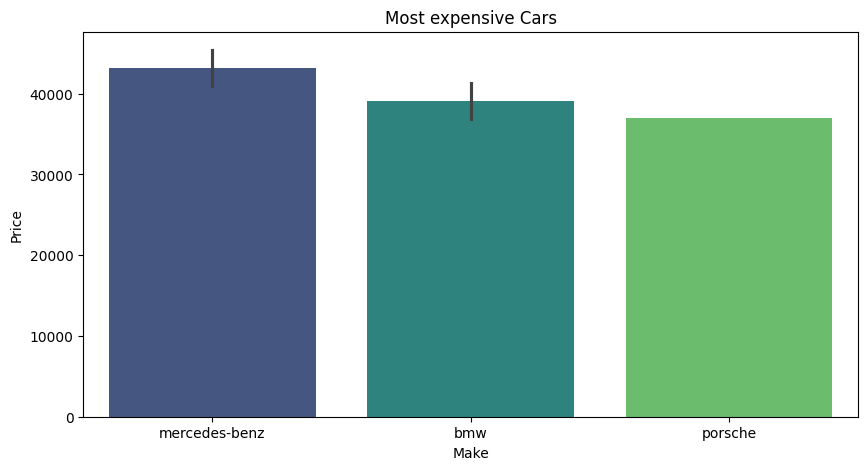

C:\Users\skhum\AppData\Local\Temp\ipykernel_15748\3483350794.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cheapest_cars, x='make', y='price', palette='viridis')


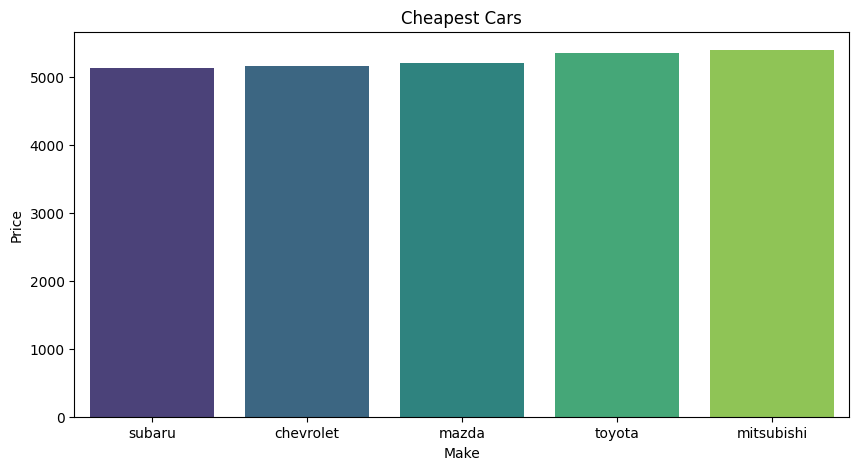

In [35]:
# Sort tge dataFrame by price in descending order and select the top 5
print("Most expensive cars")
most_expensive_cars = df.sort_values(by='price', ascending=False).head(5)
print(most_expensive_cars[['make', 'price']])

print("Cheapest cars")
cheapest_cars = df.sort_values(by='price').head(5)
print(cheapest_cars[['make', 'price']])

plt.figure(figsize=(10, 5))
sns.barplot(data=most_expensive_cars, x='make', y='price', palette='viridis')
plt.title('Most expensive Cars')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=cheapest_cars, x='make', y='price', palette='viridis')
plt.title('Cheapest Cars')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

Mercedes-Benz, BMW and Porsche have a high price with the prices being in and around 40000.
Subaru appears to have car with small price just above 5000 following Chevrolet.

#### Distribution of car prices 

Get the distribution of car price to identify the most common price range on outliers.

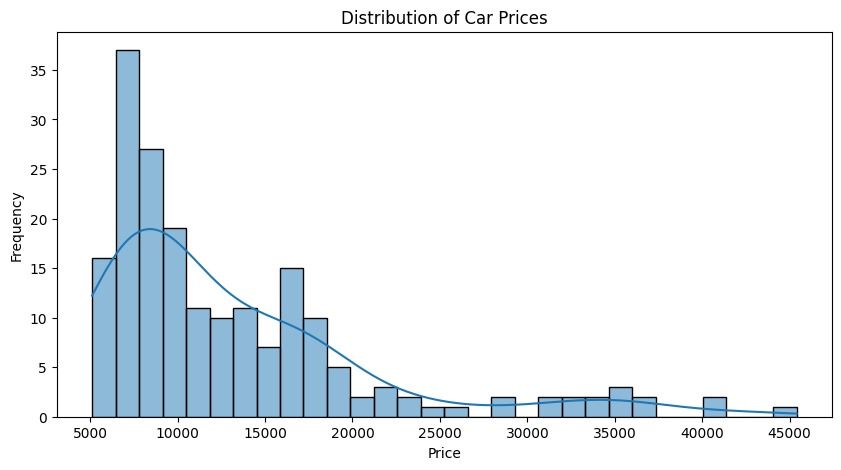

In [36]:
# Distributin of car prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
    

The distribution appears to be right-skewed, meaning there are a few cars with very high price compared to the rest.

#### Compare horsepower and price. 
Explore the relationship between horsepower and top 30 expensive cars and see how engine power influence car pricing.

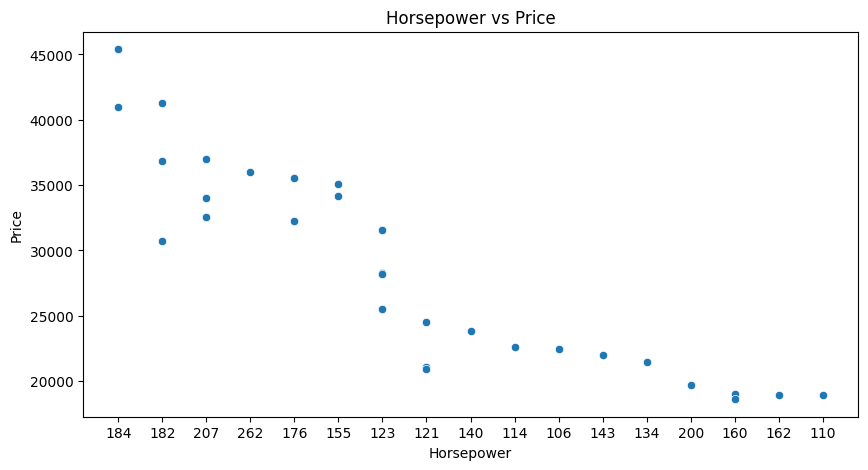

In [37]:
# Scatter plot of horsepower vs price
most_expensive_cars = df.sort_values(by='price', ascending=False).head(30)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='horsepower', y='price', data=most_expensive_cars)
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

The dots represent individual data, indicating that generally, as the horsepower increases, the price also tends to increase. However high horsepower may not always mean high price as shown in the scatter plot above (example, 200 horsepower with around 20000 price and 184 horsepower with around 45000 price)

#### Compare Engine size and price

Explore the relationship between engine size and price to see how engine size influences car pricing.

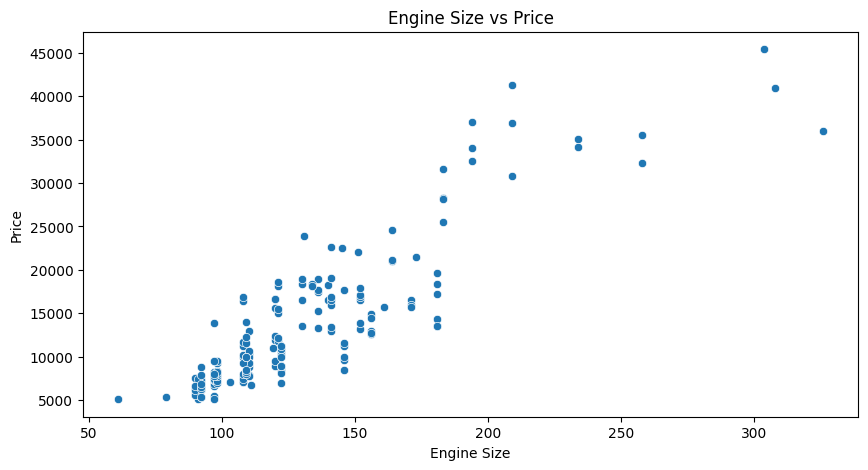

In [38]:
# Scatter plot of engine size vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='engine-size', y='price', data=df)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()



This scatter plot shows that as the engine size increases the price also tends to increase.

#### Car body style distribution 
Explore the distribution of car body style to see which body style is most preferred.

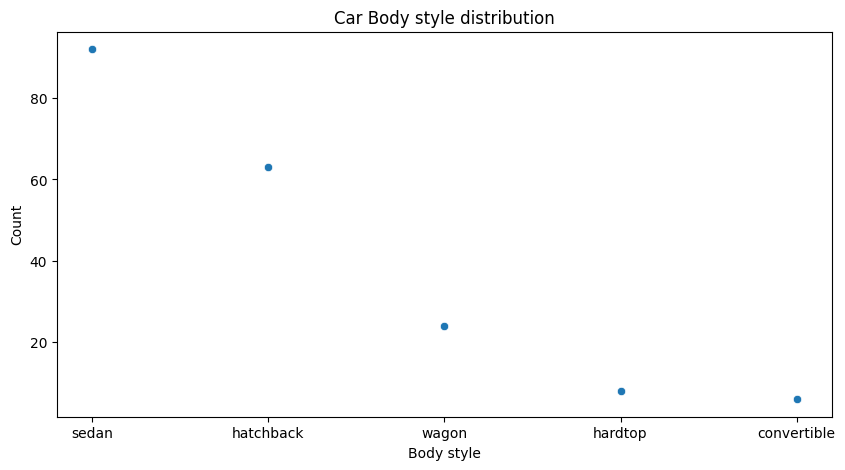

In [39]:
 # Car body style distribution
body_style_counts = df['body-style'].value_counts()
plt.figure(figsize=(10, 5))
sns.scatterplot(x=body_style_counts.index, y=body_style_counts.values)
plt.title('Car Body style distribution')
plt.xlabel('Body style')
plt.ylabel('Count')
plt.show()

Sedan is the most common body style with counts above 80. Hatchback and wagon are moderately common with counts between 40 and 60. Hardtop and Convertible are least common with counts around or below 20.